# Description:
 This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

- **MedInc**: median income in block group
- **HouseAge**: median house age in block group
- **AveRooms**: average number of rooms per household
- **AveBedrms**: average number of bedrooms per household
- **Population**: block group population
- **AveOccup**: average number of household members
- **Latitude**: block group latitude
- **Longitude**: block group longitude

Here, Stochastic Gradient Descent algorithm and Multiple Linear Regression are used and using the $R^2$ value a comparison is drawn.

# Import Libraries and Datasets

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the California Housing dataset
X, y = fetch_california_housing(return_X_y=True)

In [3]:
import pandas as pd

# Create a dataframe from the input data X and column names
df = pd.DataFrame(X, columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                              'Latitude', 'Longitude'])

# Add the target variable 'Price' to the dataframe
df['Price'] = y

# Display the first 5 rows of the dataframe
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Descriptive Statistics

In [4]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Dataset dimensions - (rows, columns)
df.shape

(20640, 9)

**Null value Checking**

In [6]:
# This code checks for missing values in a DataFrame.
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [7]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


**Correlation Matrix**

In [8]:
# Compute the correlation matrix of the DataFrame
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [9]:
#count of duplicated rows
df.duplicated().sum()

0

# Observations:
1. There are 20640 records with 8 features.
2. Each feature is of float data type.
3. There is no null value in the dataset.

# Data Visualisation

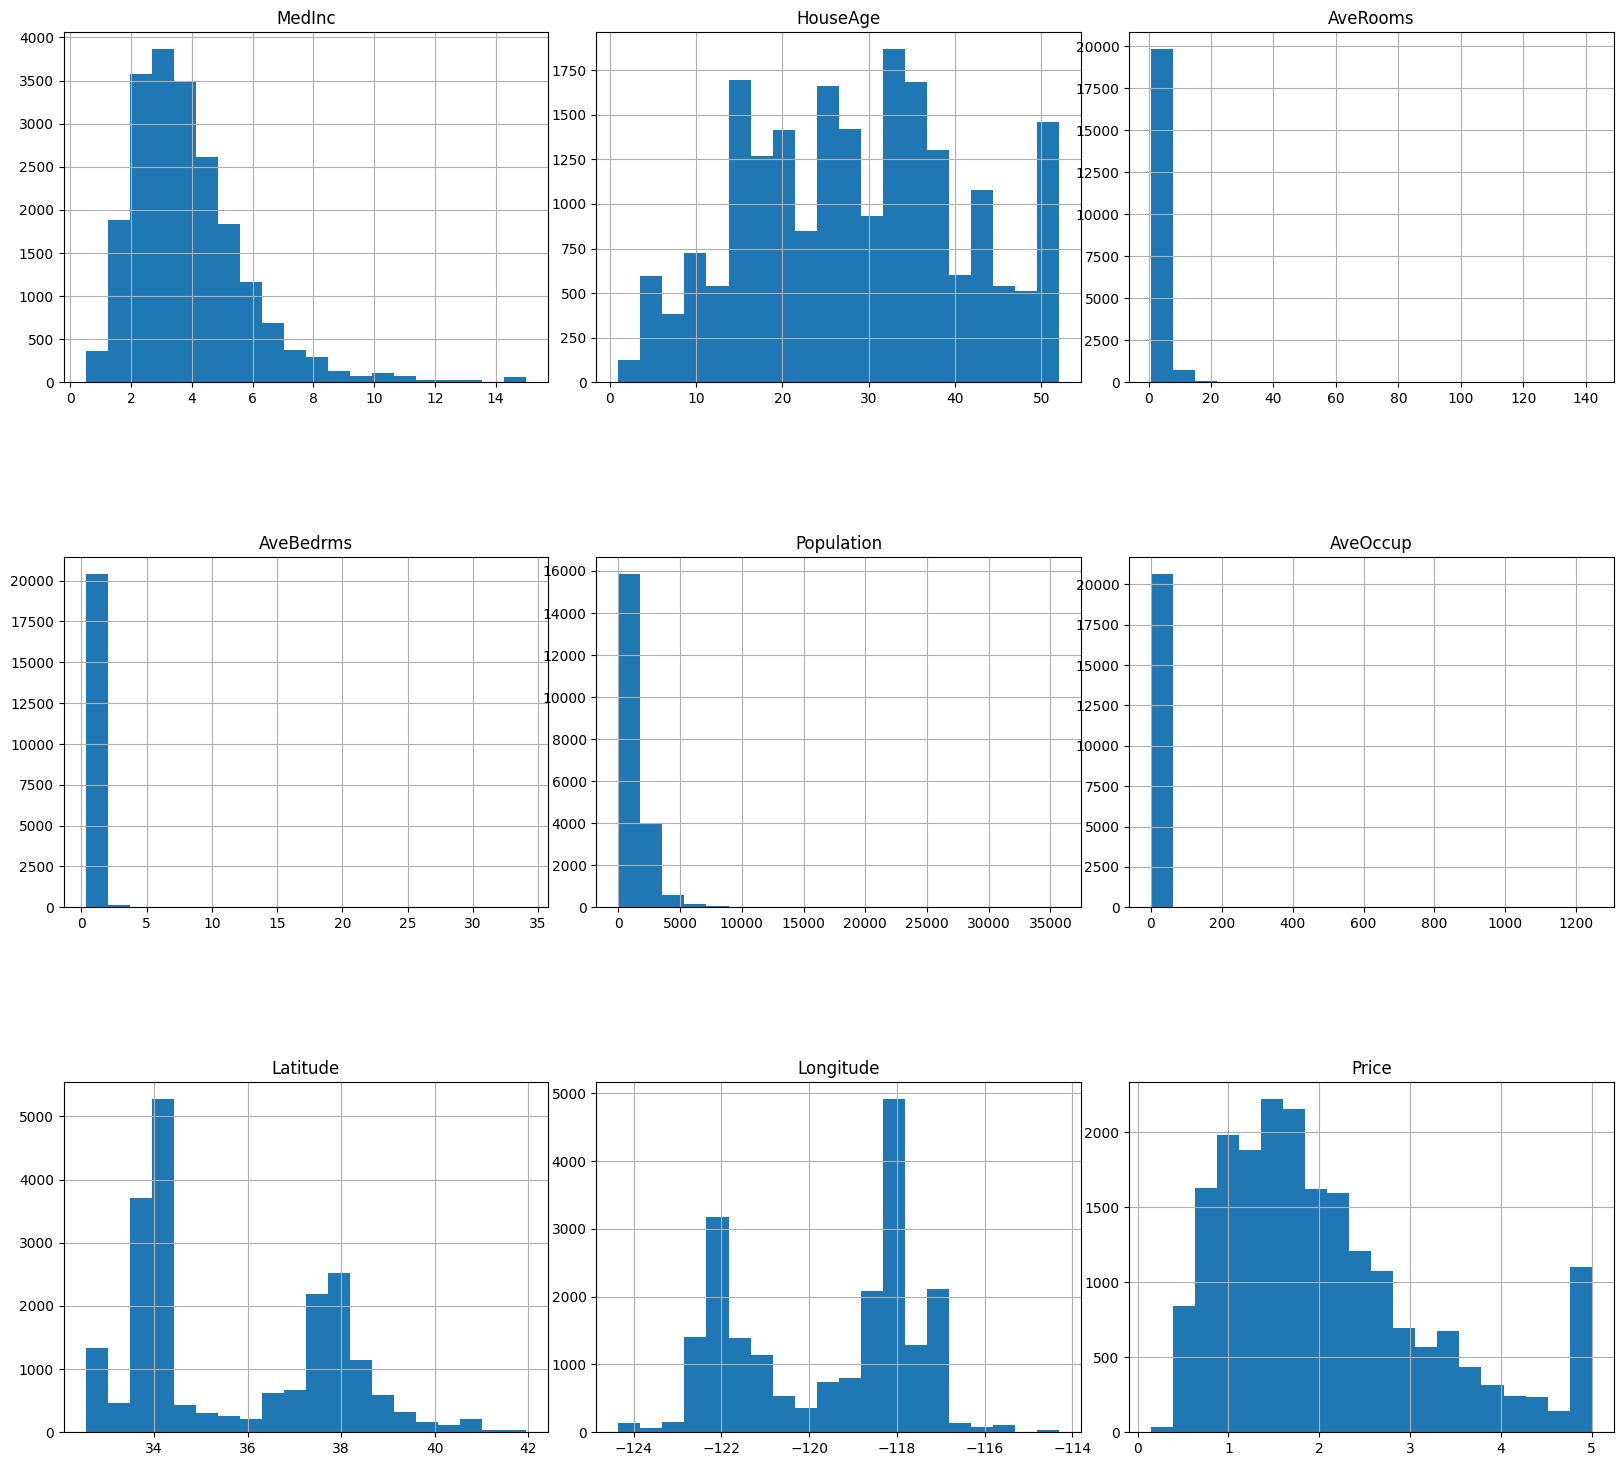

In [10]:
# Histogram of each feature
import itertools

col = df.columns
plt.subplots(figsize = (20, 25))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length//2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

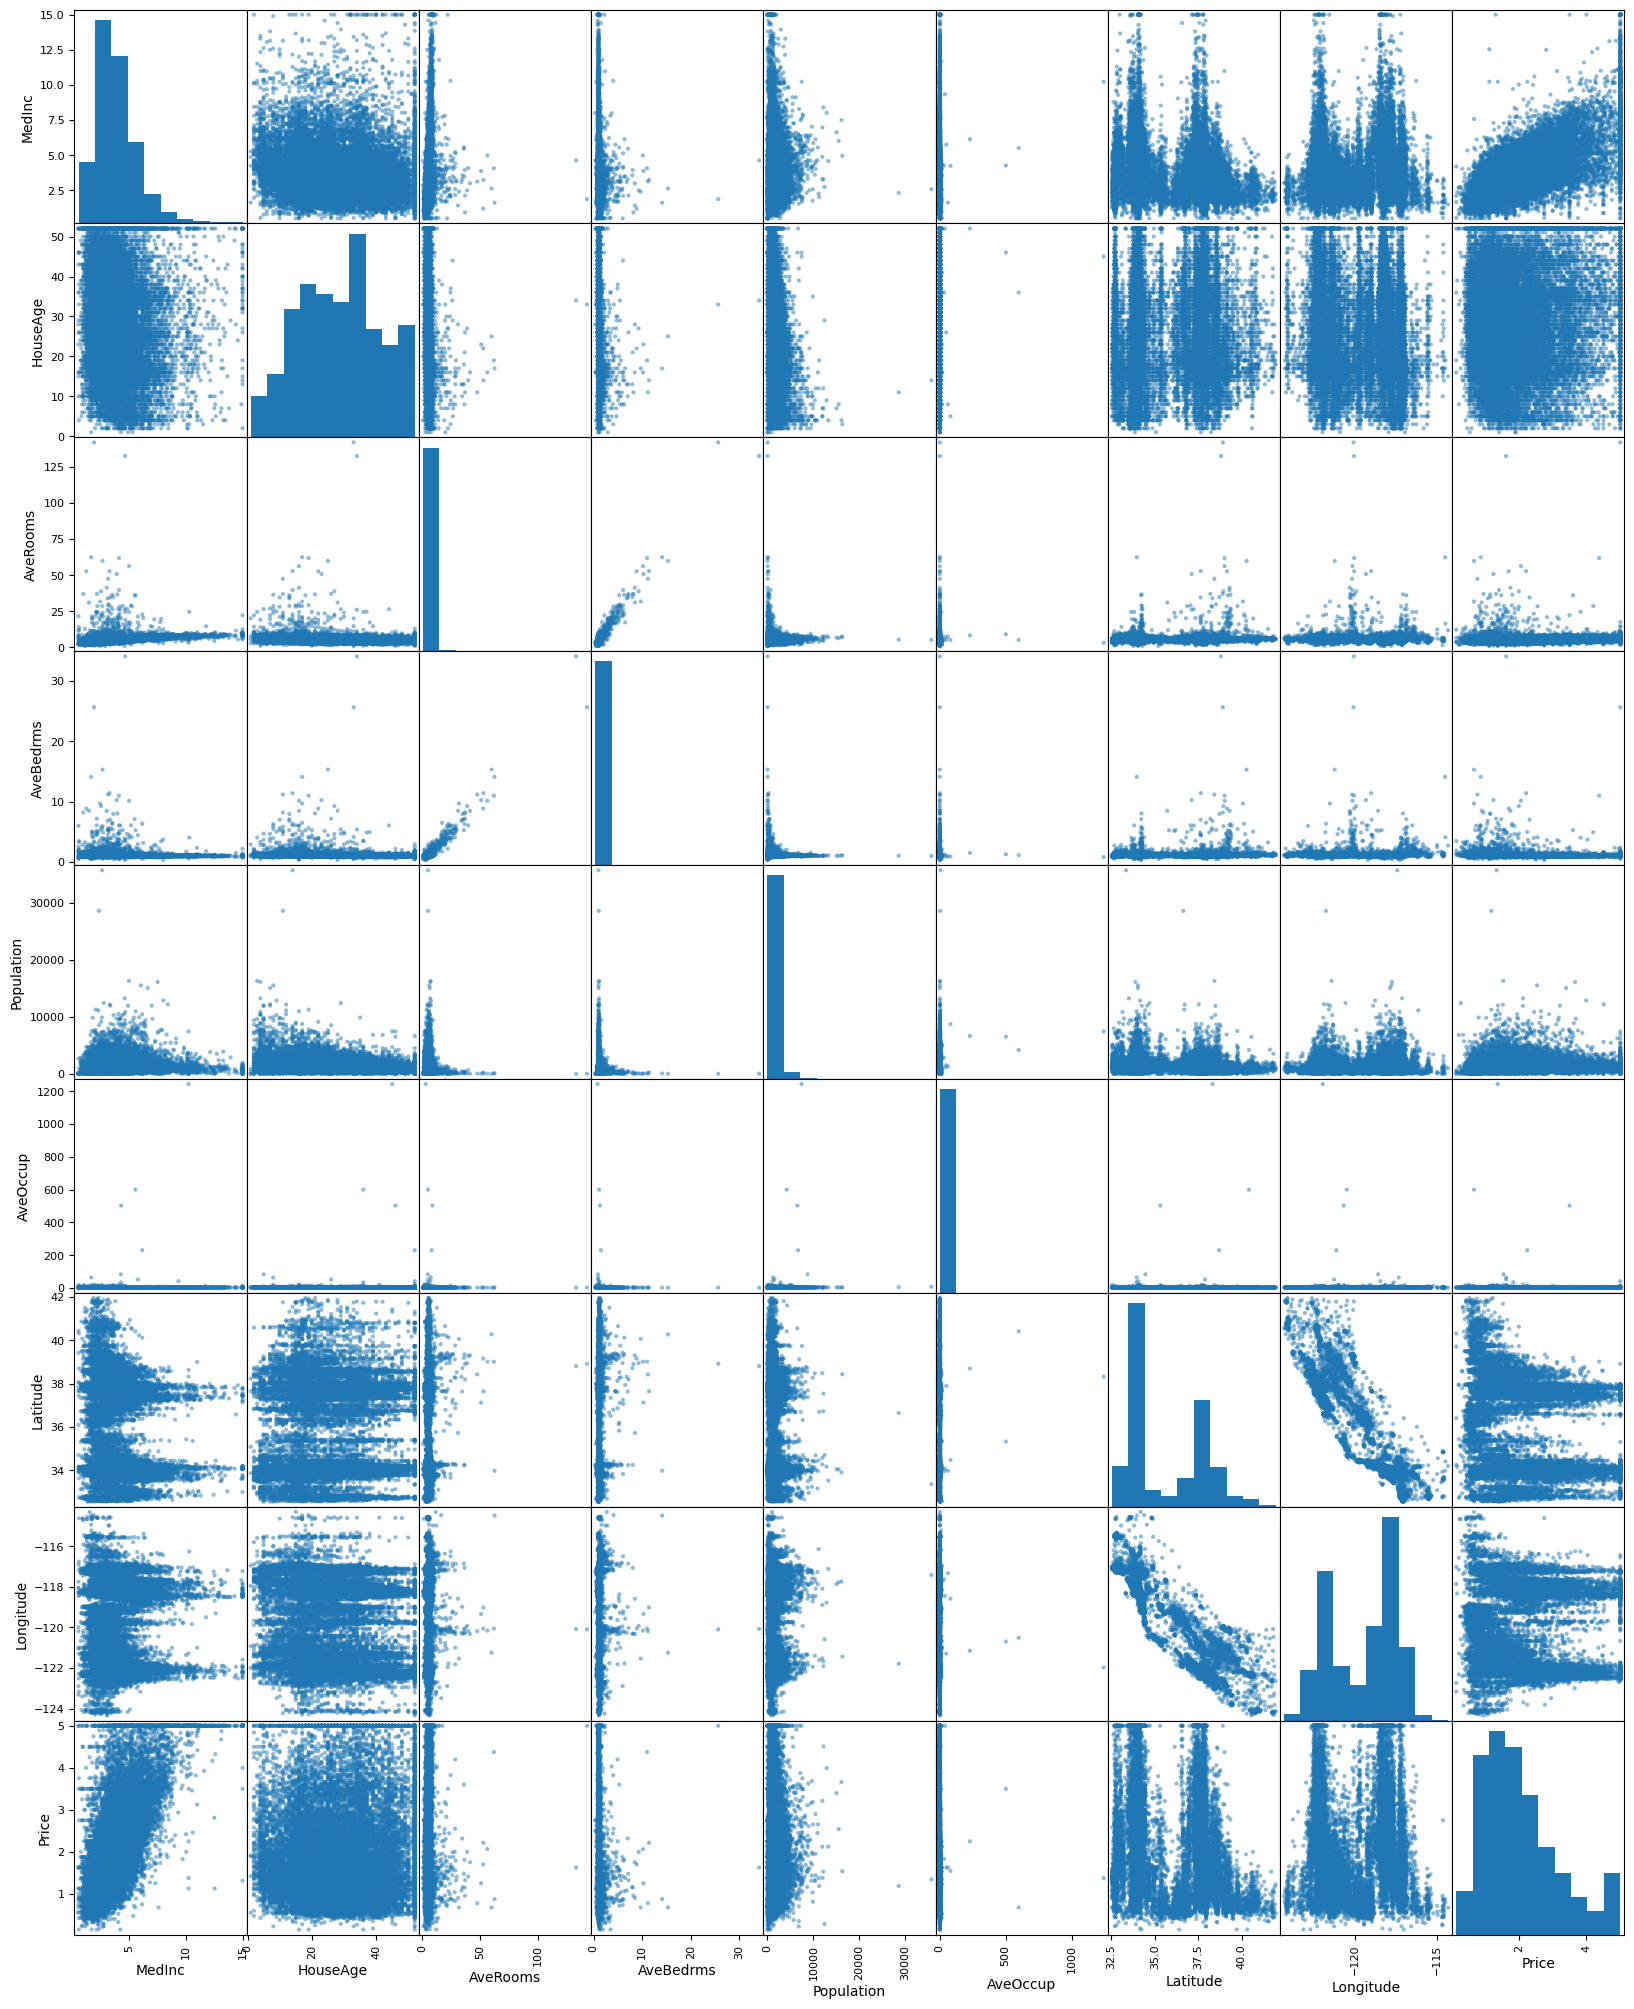

In [11]:
#scatter matrix plot
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,25));

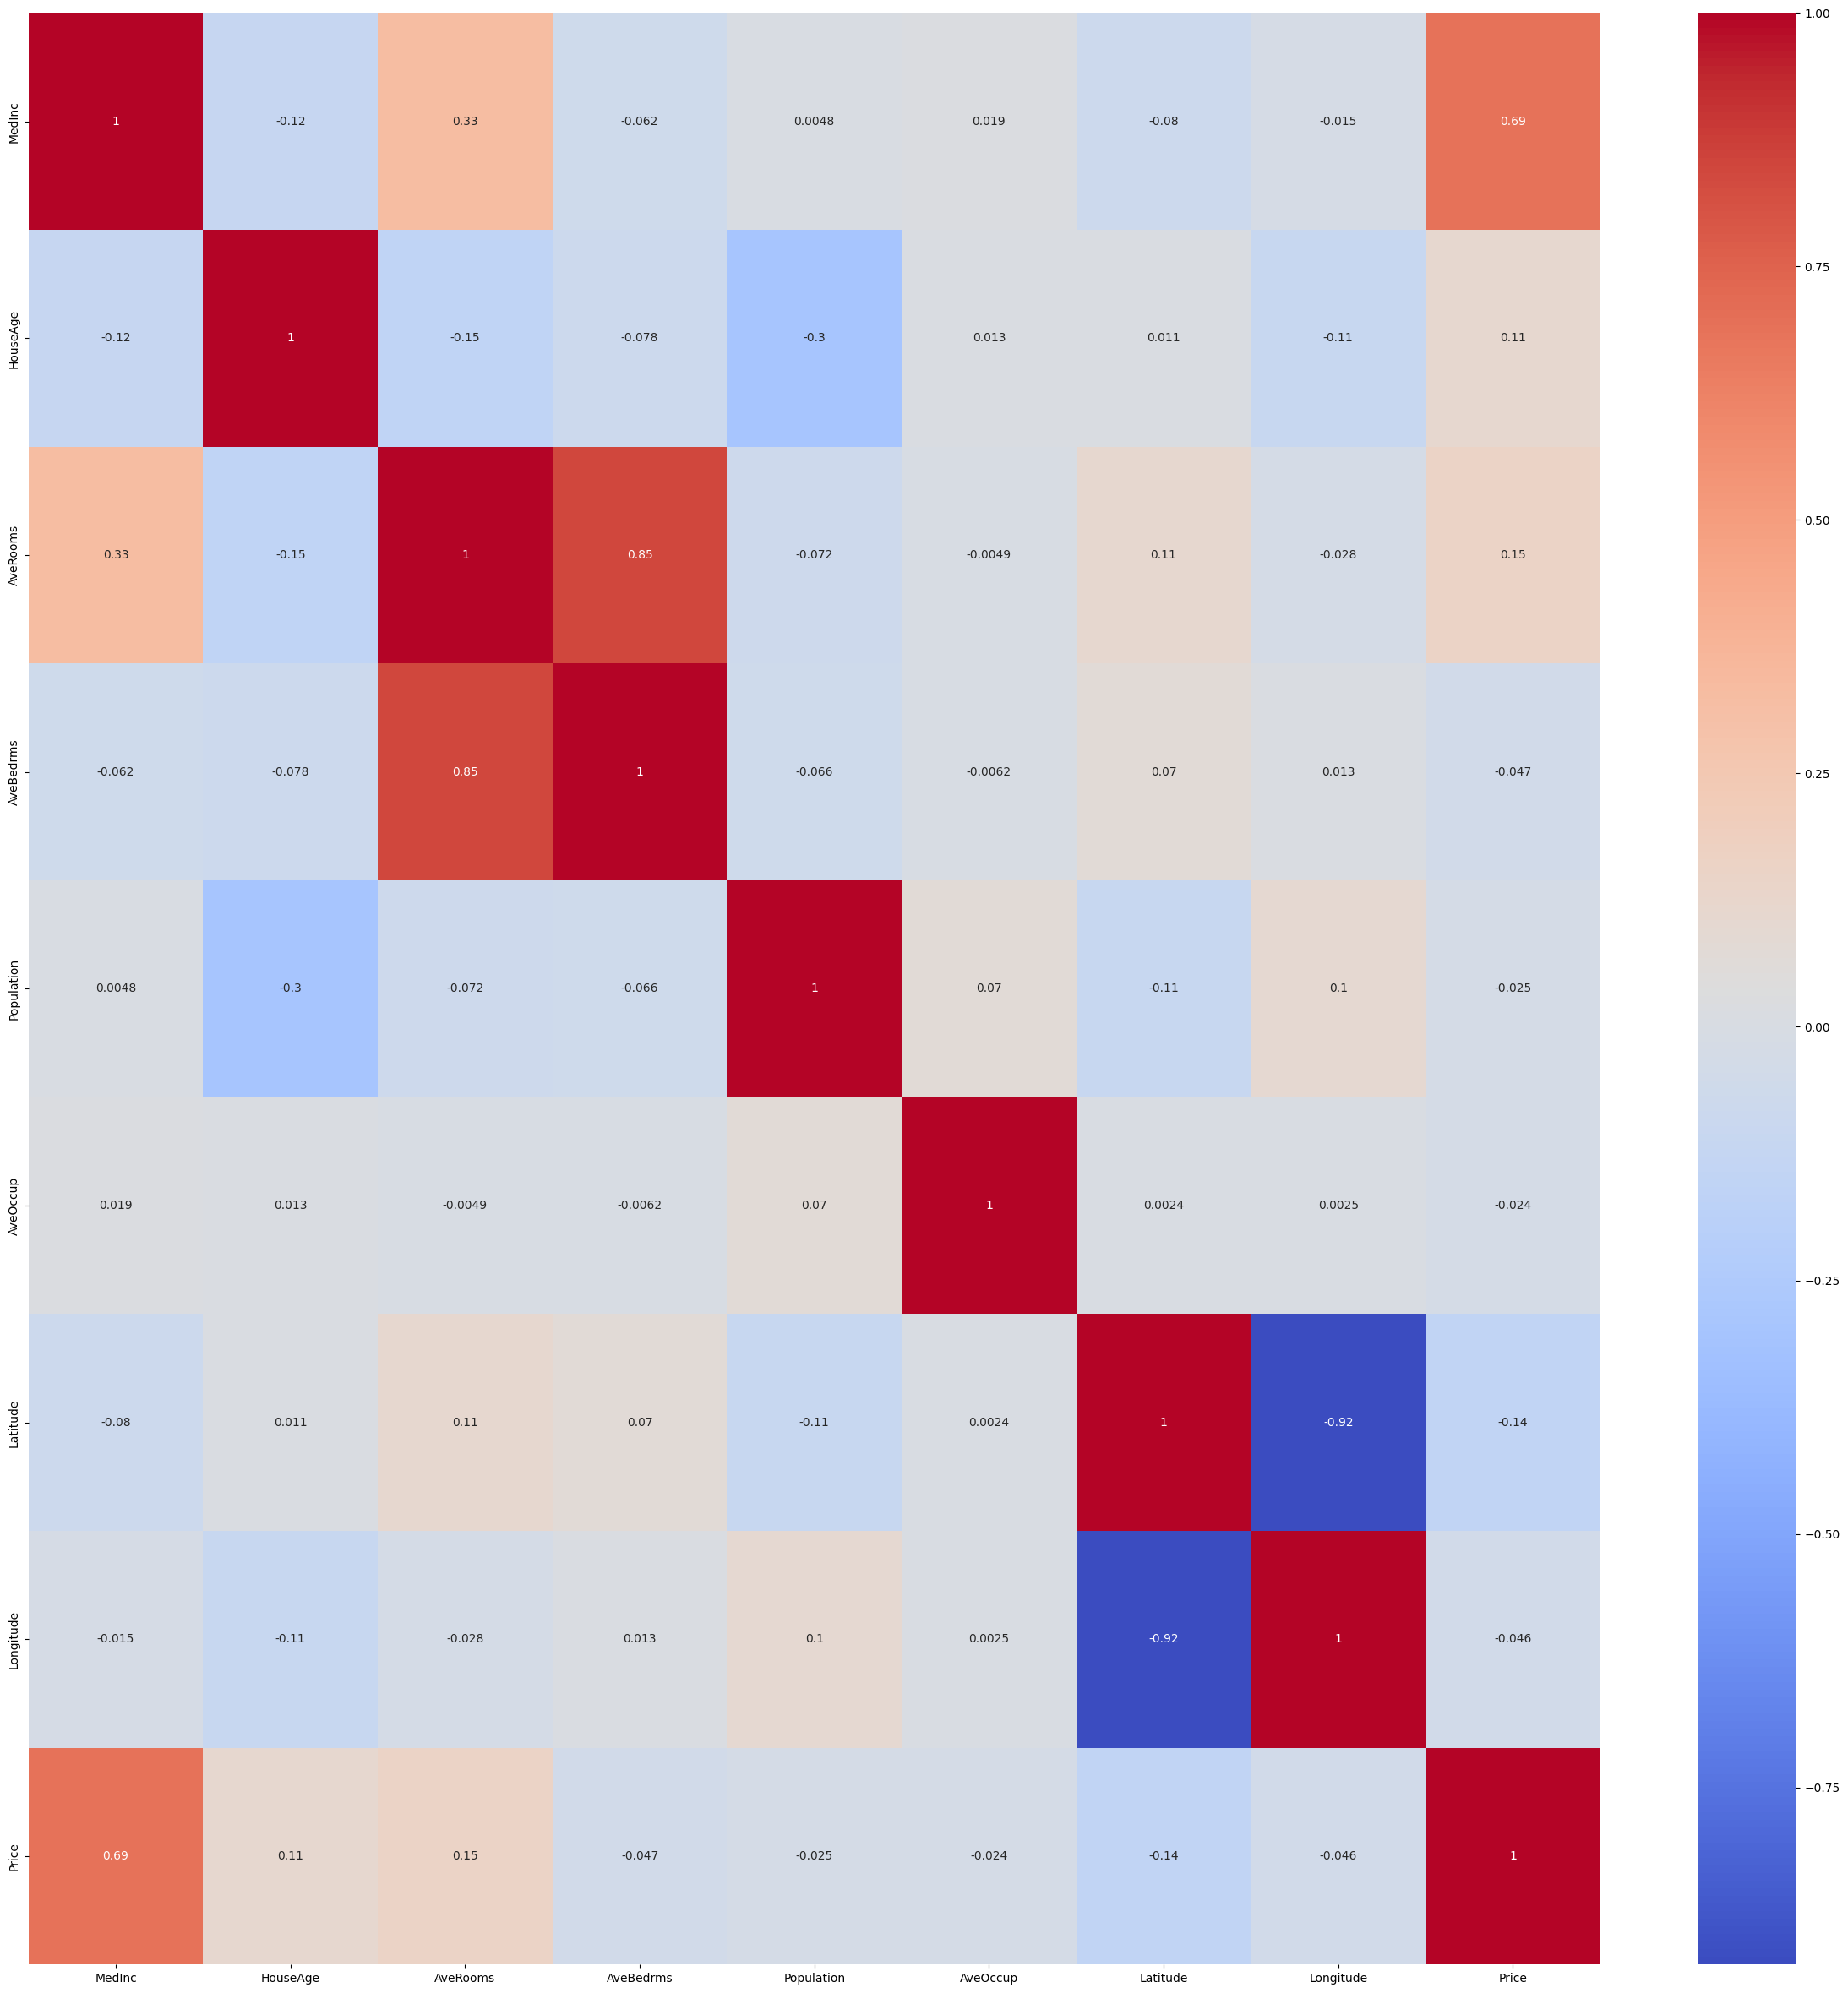

In [12]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(30,30))
# Heatmap
sns.heatmap(df.corr(), annot = True,ax = ax, cmap='coolwarm')
plt.show()

# Data Pre-Processing

For Outlier removal, z-score capping is used here.

In [13]:
def outlier_detec(col):
  mean = np.mean(col)
  sd = np.std(col)
  upp_bd = mean + 3*sd
  low_bd = mean - 3*sd
  return upp_bd,low_bd

In [14]:
upp_lis = []
low_lis = []
col = df.columns
length = len(col)
for i in col:
  upp,low = outlier_detec(df[i])
  upp_lis.append(upp)
  low_lis.append(low)

d = {'Upper Bound':upp_lis, 'Lower Bound': low_lis}
outlier_df = pd.DataFrame(d,index=col)
outlier_df

,Upper Bound,Lower Bound
MedInc,9.569998,-1.828656
HouseAge,66.395245,-9.116272
AveRooms,12.851339,-1.993340
AveBedrms,2.518373,-0.325023
Population,4822.780807,-1971.827319
AveOccup,34.228049,-28.086739
Latitude,42.039563,29.224159
Longitude,-113.559255,-125.580154
Price,5.530343,-1.393226


*Before Outlier Treatment*

In [15]:
count_lis = []
for i in col:
  upp,low = outlier_df.loc[i]
  count = sum((df[i]>upp)|(df[i]<low))
  count_lis.append(count)

d = {'Outlier Count':count_lis}
outlier_count_df = pd.DataFrame(d, index = col)
outlier_count_df

,Outlier Count
MedInc,345
HouseAge,0
AveRooms,133
AveBedrms,145
Population,342
AveOccup,8
Latitude,0
Longitude,0
Price,0


In [16]:
count_lis = []
for i in col:
  upp,low = outlier_detec(df[i])
  df[i] = np.where(df[i]>upp,upp,np.where(df[i]<low,low,df[i]))

*After Outlier Treatment*

In [17]:
count_lis = []
for i in col:
  upp,low = outlier_df.loc[i]
  count = sum((df[i]>upp)|(df[i]<low))
  count_lis.append(count)

d = {'Outlier Count':count_lis}
outlier_count_df1 = pd.DataFrame(d, index = col)
outlier_count_df1

,Outlier Count
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


**Train Test Splitting**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Price'],axis = 1),df.Price,test_size=0.2,random_state=42)

In [19]:
#The shape of the training and testing dataset
print(f'The shape of X train , X test, y train y test are: {X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape} ')

The shape of X train , X test, y train y test are: (16512, 8), (16512,), (4128, 8), (4128,) 


**Standard Scaling**

In [20]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scl = sc.fit_transform(X_train)
X_test_scl = sc.transform(X_test)

# Model Building

In [21]:
#Implementing Stochastic Gradient Descent Algorithm and Multiple Linear Regression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [22]:
sgd = SGDRegressor()
lr = LinearRegression()
sgd.fit(X_train_scl,y_train)
lr.fit(X_train_scl,y_train)

LinearRegression()

In [23]:
y_pred1 = sgd.predict(X_test_scl)
y_pred2 = lr.predict(X_test_scl)

# Model Evaluation

$$R^2 = 1 - \frac{SSE}{SST}$$ Where $SSE$ is the sum of sqaures of error terms and $SST$ is the total squares. Using this, the models' performances are evaluated. Higher the $R^2$ value, better the model performance.

In [24]:
# model evaluation using R^2 Value
print(f'The R2 score from Stochastic Gradient is: {r2_score(y_test,y_pred1)}\nThe R2 score from Linear Regression model is: {r2_score(y_test,y_pred2)}')

The R2 score from Stochastic Gradient is: 0.6254229422474195
The R2 score from Linear Regression model is: 0.6261891828708404
